In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [16]:
from scipy.linalg import toeplitz,inv,solve_toeplitz

In [7]:
acf = np.loadtxt('./reproduce/t6/221/GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_cropped_H1_1126257414_4096_4.0_4096.0_0.1.txt')

In [8]:
len(acf)

409

In [9]:
c = toeplitz(acf)

In [11]:
acf

array([ 2.23375825e-40, -1.03337014e-41, -1.90475634e-40,  6.66943291e-42,
        1.55342186e-40,  5.25430084e-41, -1.60691532e-40, -8.68701270e-41,
        2.01729356e-40,  7.65269513e-41, -1.93917230e-40, -5.34257723e-41,
        1.49772683e-40,  8.79721147e-41, -1.19625323e-40, -1.38051528e-40,
        1.45797269e-40,  1.51994477e-40, -1.61779074e-40, -1.20674563e-40,
        1.30523670e-40,  1.19370711e-40, -7.84049827e-41, -1.61639488e-40,
        7.29113015e-41,  1.97371717e-40, -9.60369594e-41, -1.78698319e-40,
        8.95382116e-41,  1.49595189e-40, -3.89598955e-41, -1.64871276e-40,
        1.59021974e-42,  2.04743515e-40, -1.23081673e-41, -2.09816531e-40,
        2.52859206e-41,  1.72722316e-40,  3.66364840e-42, -1.56621760e-40,
       -5.61004573e-41,  1.79987181e-40,  6.88408223e-41, -2.03385259e-40,
       -5.27341576e-41,  1.76901618e-40,  5.31497659e-41, -1.41508257e-40,
       -9.85801387e-41,  1.36139662e-40,  1.30648483e-40, -1.61002167e-40,
       -1.26400862e-40,  

In [10]:
c

array([[ 2.23375825e-40, -1.03337014e-41, -1.90475634e-40, ...,
        -2.03844853e-41,  2.83972077e-41,  4.12037777e-41],
       [-1.03337014e-41,  2.23375825e-40, -1.03337014e-41, ...,
        -5.55039022e-41, -2.03844853e-41,  2.83972077e-41],
       [-1.90475634e-40, -1.03337014e-41,  2.23375825e-40, ...,
         2.07105726e-41, -5.55039022e-41, -2.03844853e-41],
       ...,
       [-2.03844853e-41, -5.55039022e-41,  2.07105726e-41, ...,
         2.23375825e-40, -1.03337014e-41, -1.90475634e-40],
       [ 2.83972077e-41, -2.03844853e-41, -5.55039022e-41, ...,
        -1.03337014e-41,  2.23375825e-40, -1.03337014e-41],
       [ 4.12037777e-41,  2.83972077e-41, -2.03844853e-41, ...,
        -1.90475634e-40, -1.03337014e-41,  2.23375825e-40]])

In [12]:
invc = inv(c)

In [13]:
invc

array([[ 3.55104532e+42, -1.73810334e+42,  4.00361590e+42, ...,
         8.72891314e+40, -3.99136564e+40,  1.26536177e+40],
       [-1.73810334e+42,  4.40173655e+42, -3.69758076e+42, ...,
        -1.17030834e+41,  9.25590822e+40, -3.99136564e+40],
       [ 4.00361590e+42, -3.69758076e+42,  8.91515323e+42, ...,
         1.55777695e+41, -1.17030834e+41,  8.72891313e+40],
       ...,
       [ 8.72891313e+40, -1.17030834e+41,  1.55777696e+41, ...,
         8.91515323e+42, -3.69758076e+42,  4.00361590e+42],
       [-3.99136564e+40,  9.25590822e+40, -1.17030834e+41, ...,
        -3.69758076e+42,  4.40173655e+42, -1.73810334e+42],
       [ 1.26536177e+40, -3.99136564e+40,  8.72891313e+40, ...,
         4.00361590e+42, -1.73810334e+42,  3.55104532e+42]])

In [14]:
np.dot(invc,c)

array([[ 1.00000000e+00,  1.13686838e-13,  5.68434189e-14, ...,
        -1.25055521e-12, -6.39488462e-14, -2.64321898e-12],
       [-6.28830321e-13,  1.00000000e+00,  1.88293825e-12, ...,
        -4.83169060e-13, -1.67332814e-12,  3.11217718e-12],
       [ 4.36273240e-12,  4.71800377e-12,  1.00000000e+00, ...,
         5.40012479e-13,  1.81898940e-12, -5.85487214e-12],
       ...,
       [ 1.13686838e-13, -4.26325641e-13,  1.23634436e-12, ...,
         1.00000000e+00,  1.82822646e-11,  3.78008735e-12],
       [-1.23634436e-12,  1.26476607e-12,  1.09423581e-12, ...,
        -4.66116035e-12,  1.00000000e+00, -1.44950718e-12],
       [-3.44613227e-13,  1.98951966e-13,  5.57776048e-13, ...,
         2.99138492e-12,  6.21946938e-12,  1.00000000e+00]])

In [15]:
I = np.identity(len(acf))

In [17]:
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
I[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
c

array([[ 2.23375825e-40, -1.03337014e-41, -1.90475634e-40, ...,
        -2.03844853e-41,  2.83972077e-41,  4.12037777e-41],
       [-1.03337014e-41,  2.23375825e-40, -1.03337014e-41, ...,
        -5.55039022e-41, -2.03844853e-41,  2.83972077e-41],
       [-1.90475634e-40, -1.03337014e-41,  2.23375825e-40, ...,
         2.07105726e-41, -5.55039022e-41, -2.03844853e-41],
       ...,
       [-2.03844853e-41, -5.55039022e-41,  2.07105726e-41, ...,
         2.23375825e-40, -1.03337014e-41, -1.90475634e-40],
       [ 2.83972077e-41, -2.03844853e-41, -5.55039022e-41, ...,
        -1.03337014e-41,  2.23375825e-40, -1.03337014e-41],
       [ 4.12037777e-41,  2.83972077e-41, -2.03844853e-41, ...,
        -1.90475634e-40, -1.03337014e-41,  2.23375825e-40]])

In [22]:
c.shape

(409, 409)

In [23]:
I[0].shape

(409,)

In [27]:
I = np.zeros(len(acf))

In [28]:
I[0] = 1

In [30]:
I.shape

(409,)

In [31]:
b = np.array([1, 2, 2, 5])

In [32]:
b.shape

(4,)

In [33]:
b = solve_toeplitz(acf,I)

In [34]:
b

array([ 3.55104532e+42, -1.73810334e+42,  4.00361590e+42, -5.31989300e+42,
        6.03719121e+42, -8.18719579e+42,  8.84963211e+42, -1.03121360e+43,
        1.04922930e+43, -1.23588093e+43,  1.25631060e+43, -1.35988607e+43,
        1.33899619e+43, -1.42491896e+43,  1.38698603e+43, -1.40630613e+43,
        1.37931756e+43, -1.41534831e+43,  1.42677650e+43, -1.38614450e+43,
        1.41731023e+43, -1.39782074e+43,  1.41896941e+43, -1.41248758e+43,
        1.42299851e+43, -1.47891633e+43,  1.46498657e+43, -1.47025222e+43,
        1.48516486e+43, -1.46994841e+43,  1.48959629e+43, -1.43686443e+43,
        1.45028341e+43, -1.41323921e+43,  1.36831309e+43, -1.29813902e+43,
        1.25380572e+43, -1.17955528e+43,  1.10513289e+43, -1.01697040e+43,
        9.34111114e+42, -8.55083341e+42,  7.50196782e+42, -6.44439606e+42,
        5.80908608e+42, -4.75007737e+42,  4.03081635e+42, -3.15110898e+42,
        2.46317894e+42, -1.95400957e+42,  1.20267160e+42, -7.42185285e+41,
        4.41904514e+41, -

In [36]:
b

array([ 3.55104532e+42, -1.73810334e+42,  4.00361590e+42, -5.31989300e+42,
        6.03719121e+42, -8.18719579e+42,  8.84963211e+42, -1.03121360e+43,
        1.04922930e+43, -1.23588093e+43,  1.25631060e+43, -1.35988607e+43,
        1.33899619e+43, -1.42491896e+43,  1.38698603e+43, -1.40630613e+43,
        1.37931756e+43, -1.41534831e+43,  1.42677650e+43, -1.38614450e+43,
        1.41731023e+43, -1.39782074e+43,  1.41896941e+43, -1.41248758e+43,
        1.42299851e+43, -1.47891633e+43,  1.46498657e+43, -1.47025222e+43,
        1.48516486e+43, -1.46994841e+43,  1.48959629e+43, -1.43686443e+43,
        1.45028341e+43, -1.41323921e+43,  1.36831309e+43, -1.29813902e+43,
        1.25380572e+43, -1.17955528e+43,  1.10513289e+43, -1.01697040e+43,
        9.34111114e+42, -8.55083341e+42,  7.50196782e+42, -6.44439606e+42,
        5.80908608e+42, -4.75007737e+42,  4.03081635e+42, -3.15110898e+42,
        2.46317894e+42, -1.95400957e+42,  1.20267160e+42, -7.42185285e+41,
        4.41904514e+41, -

In [37]:
invc[0]

array([ 3.55104532e+42, -1.73810334e+42,  4.00361590e+42, -5.31989301e+42,
        6.03719121e+42, -8.18719580e+42,  8.84963211e+42, -1.03121361e+43,
        1.04922930e+43, -1.23588093e+43,  1.25631060e+43, -1.35988607e+43,
        1.33899619e+43, -1.42491896e+43,  1.38698603e+43, -1.40630613e+43,
        1.37931756e+43, -1.41534831e+43,  1.42677650e+43, -1.38614450e+43,
        1.41731023e+43, -1.39782074e+43,  1.41896941e+43, -1.41248758e+43,
        1.42299851e+43, -1.47891633e+43,  1.46498657e+43, -1.47025222e+43,
        1.48516486e+43, -1.46994841e+43,  1.48959629e+43, -1.43686443e+43,
        1.45028342e+43, -1.41323921e+43,  1.36831309e+43, -1.29813902e+43,
        1.25380572e+43, -1.17955528e+43,  1.10513289e+43, -1.01697040e+43,
        9.34111114e+42, -8.55083341e+42,  7.50196782e+42, -6.44439606e+42,
        5.80908608e+42, -4.75007737e+42,  4.03081635e+42, -3.15110898e+42,
        2.46317894e+42, -1.95400957e+42,  1.20267160e+42, -7.42185285e+41,
        4.41904513e+41, -

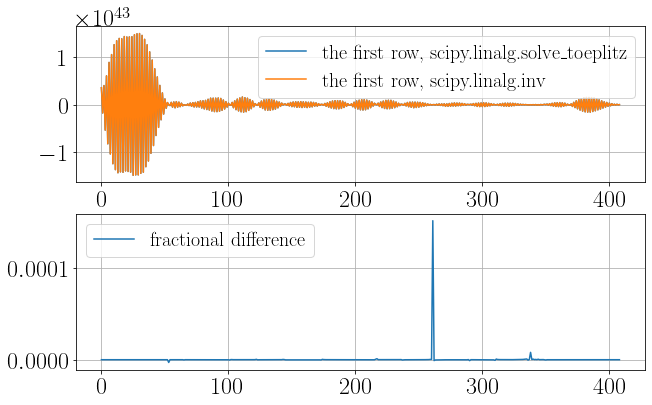

In [44]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(b,label='the first row, scipy.linalg.solve_toeplitz')
ax.plot(invc[0],label='the first row, scipy.linalg.inv')
ax.legend()

bx = fig.add_subplot(212,sharex=ax)
bx.plot((invc[0]-b)/invc[0],label='fractional difference')
bx.legend()

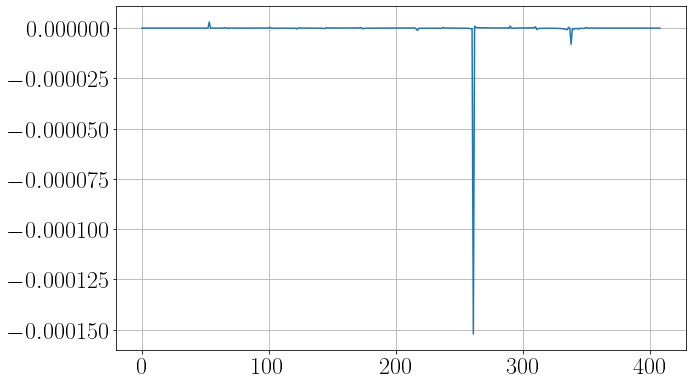

In [42]:
plt.plot((b-invc[0])/b)